## Chronic Kidney Disease Dataset analysis

This notebook analyzes dataset obtained from patients diagnosed with Chronic Kidney Diease (CKD). The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, medication usage, symptoms, quality of life scores, environmental exposures, and health behaviors.

Source: https://www.kaggle.com/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis

Contributors: Adithya Hadidi, Kateryna Skoropad, Zarrin Rasizadeh, Anjali Deshpande

In [117]:
# Import standard libraries in this section
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


## Data exploration

In [118]:
df = pd.read_csv("../data/raw/Chronic_Kidney_Dsease_data.csv")

df

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,4.076434,0,0,0,0,0,113,83,72.510788,9.212397,4.962531,25.605949,45.703204,0.744980,123.849426,137.652501,3.626058,10.314420,3.152648,16.114679,207.728670,85.863656,21.967957,212.095215,0,0,4.563139,1,0,0,3.563894,6.992244,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,7.652813,1,1,0,0,0,120,67,100.848875,4.604989,3.156799,31.338166,55.784504,3.052317,88.539095,138.141335,5.332871,9.604196,2.855443,15.349205,189.450727,86.378670,87.569756,255.451314,0,0,9.097002,0,0,0,5.327336,0.356290,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,4.392786,0,0,0,0,0,147,106,160.989441,5.432599,3.698236,39.738169,67.559032,1.157839,21.170892,142.970116,4.330891,9.885786,4.353513,13.018834,284.137622,132.269872,20.049798,251.902583,0,1,3.851249,1,0,0,4.855420,4.674069,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,6.282274,0,0,0,0,0,117,65,188.506620,4.144466,2.868468,21.980958,33.202542,3.745871,123.779699,137.106913,3.810741,9.995894,4.016134,15.056339,235.112124,93.443669,58.260291,392.338425,0,0,7.881765,0,0,0,8.531685,5.691455,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,4.021639,0,0,0,0,0,98,66,82.156699,4.262979,3.964877,12.216366,56.319082,2.570993,184.852046,140.627812,4.866765,8.907622,3.947907,16.690561,258.277566,171.758356,21.583213,370.523877,1,1,4.179459,1,0,0,1.422320,2.273459,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,8.602873,5.239288,0,0,0,0,0,130,89,195.433613,7.309465,2.191402,23.207131,80.644448,2.926489,240.575604,137.142172,5.277706,9.867489,3.177054,14.331815,184.518899,133.107066,30.859157,320.668245,1,1,5.408175,0,0,0,6.973771,1.541242,6.972093,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,9.836919,6.401662,0,0,0,0,0,127,103,73.606489,4.357399,0.584633,27.145254,118.026779,3.496617,207.392143,136.744038,3.883738,9.411840,2.626317,11.397473,253.709988,131.987735,27.157762,334.818155,0,0,3.229984,1,0,1,0.465757,4.224176,0.465297,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,5.038194,8.440859,0,0,0,0,0,118,102,163.084321,8.235078,0.527432,29.733737,19.283249,3.549633,105.821102,143.887896,4.051049,8.705635,4.246865,16.727631,221.399305,183.307380,51.888571,162.784996,0,1,8.367022,0,0,0,4.537944,6.061171,2.281970,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential
1657,1658,90,0,0,2,2,24.964149,0,12.967462,0.618614,4.557577,5.527100,0,0,0,0,0,163,87,98.794331,

In [119]:
df.shape # number of rows and columns

(1659, 54)

In [120]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,4.076434,0,0,0,0,0,113,83,72.510788,9.212397,4.962531,25.605949,45.703204,0.744980,123.849426,137.652501,3.626058,10.314420,3.152648,16.114679,207.728670,85.863656,21.967957,212.095215,0,0,4.563139,1,0,0,3.563894,6.992244,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,7.652813,1,1,0,0,0,120,67,100.848875,4.604989,3.156799,31.338166,55.784504,3.052317,88.539095,138.141335,5.332871,9.604196,2.855443,15.349205,189.450727,86.378670,87.569756,255.451314,0,0,9.097002,0,0,0,5.327336,0.356290,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,4.392786,0,0,0,0,0,147,106,160.989441,5.432599,3.698236,39.738169,67.559032,1.157839,21.170892,142.970116,4.330891,9.885786,4.353513,13.018834,284.137622,132.269872,20.049798,251.902583,0,1,3.851249,1,0,0,4.855420,4.674069,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,6.282274,0,0,0,0,0,117,65,188.506620,4.144466,2.868468,21.980958,33.202542,3.745871,123.779699,137.106913,3.810741,9.995894,4.016134,15.056339,235.112124,93.443669,58.260291,392.338425,0,0,7.881765,0,0,0,8.531685,5.691455,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,4.021639,0,0,0,0,0,98,66,82.156699,4.262979,3.964877,12.216366,56.319082,2.570993,184.852046,140.627812,4.866765,8.907622,3.947907,16.690561,258.277566,171.758356,21.583213,370.523877,1,1,4.179459,1,0,0,1.422320,2.273459,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [121]:
# summary of the DataFrame (data types and number of non-null values in each column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [122]:
# statistical summaries of the numerical columns
df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,830.000000,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,5.028544,6.942324,0.141049,0.301386,0.257384,0.105485,0.210368,134.392405,89.313442,132.529429,6.983682,2.753198,27.578147,66.829202,2.493736,149.881615,139.968984,4.505336,9.489156,3.505543,13.927304,224.251158,125.044597,60.746861,224.804603,0.295359,0.318264,5.011715,0.380952,0.202532,0.201929,5.016697,3.482121,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,479.056364,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,2.865777,1.704159,0.348177,0.458998,0.437325,0.307270,0.407693,25.767794,17.354479,36.563035,1.734714,1.317168,12.808062,30.050836,1.449695,86.850287,2.905595,0.583963,0.574849,0.576634,2.338372,43.666586,42.645021,23.170415,100.321757,0.456341,0.465943,2.869813,0.485767,0.402007,0.401560,2.896311,1.986292,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,1.000000,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,0.002407,4.001053,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,70.044768,4.000405,0.501799,5.000249,15.107850,0.000900,0.178427,135.006489,3.503408,8.500033,2.503727,10.004223,150.015707,50.074597,20.030993,50.267668,0.000000,0.000000,0.000469,0.000000,0.000000,0.000000,0.015194,0.005171,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,415.500000,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,2.558443,5.487083,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,75.000000,100.504503,5.494988,1.583255,16.398275,41.149324,1.226335,76.784343,137.483563,3.993559,9.004488,2.984834,11.839478,186.440971,87.660348,41.252078,140.235507,0.000000,0.000000,2.619890,0.000000,0.000000,0.000000,2.464695,1.750661,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,830.000000,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,4.989810,6.933255,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,89.000000,131.478423,6.988001,2.732006,28.077796,66.555207,2.505260,150.195312,139.863171,4.505416,9.470789,3.511712,13.909388,223.202106,126.537520,61.845056,226.466365,0.000000,0.000000,5.078511,0.000000,0.000000,0.000000,5.117247,3.519894,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,1244.500000,72.000000,1.0000

## 1. Data Cleaning and Preprocessing

Drop *PatientID* and *DoctorInCharge* columns since they don't provide any information. 

In [123]:
# Display the summary statistics of the dataset
df = df.drop(['PatientID', 'DoctorInCharge'], axis = 1)


In [124]:
## More code to be adde here (maybe)

In [125]:
# check for missing values
df.isnull().sum()

Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
SerumElectrolytesCalcium         0
SerumElectrolytesPho

## 2. Univariate Analysis

(Source: https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/)

Display summary statistics for numerical and categorical columns

Display each feature with its count, mean, std deviation, min, max and 25%, 50%, 75% percentiles indicating the distribution of values.

In [126]:

# Display all columns 
pd.set_option('display.max_columns', None)  # None means unlimited
pd.set_option('display.width', None)  # None means unlimited width
print(df.describe(include='all'))


               Age       Gender   Ethnicity  SocioeconomicStatus  \
count  1659.000000  1659.000000  1659.00000          1659.000000   
mean     54.441230     0.515371     0.71308             0.977697   
std      20.549757     0.499914     1.00043             0.776686   
min      20.000000     0.000000     0.00000             0.000000   
25%      36.000000     0.000000     0.00000             0.000000   
50%      54.000000     1.000000     0.00000             1.000000   
75%      72.000000     1.000000     1.00000             2.000000   
max      90.000000     1.000000     3.00000             2.000000   

       EducationLevel          BMI      Smoking  AlcoholConsumption  \
count     1659.000000  1659.000000  1659.000000         1659.000000   
mean         1.693189    27.620049     0.292948            9.969831   
std          0.910611     7.288670     0.455252            5.798787   
min          0.000000    15.033888     0.000000            0.021740   
25%          1.000000    21.4714

For the numerical variables, visualizing distributions using histograms, box plots, or density plots to understand the spread and skewness of data.

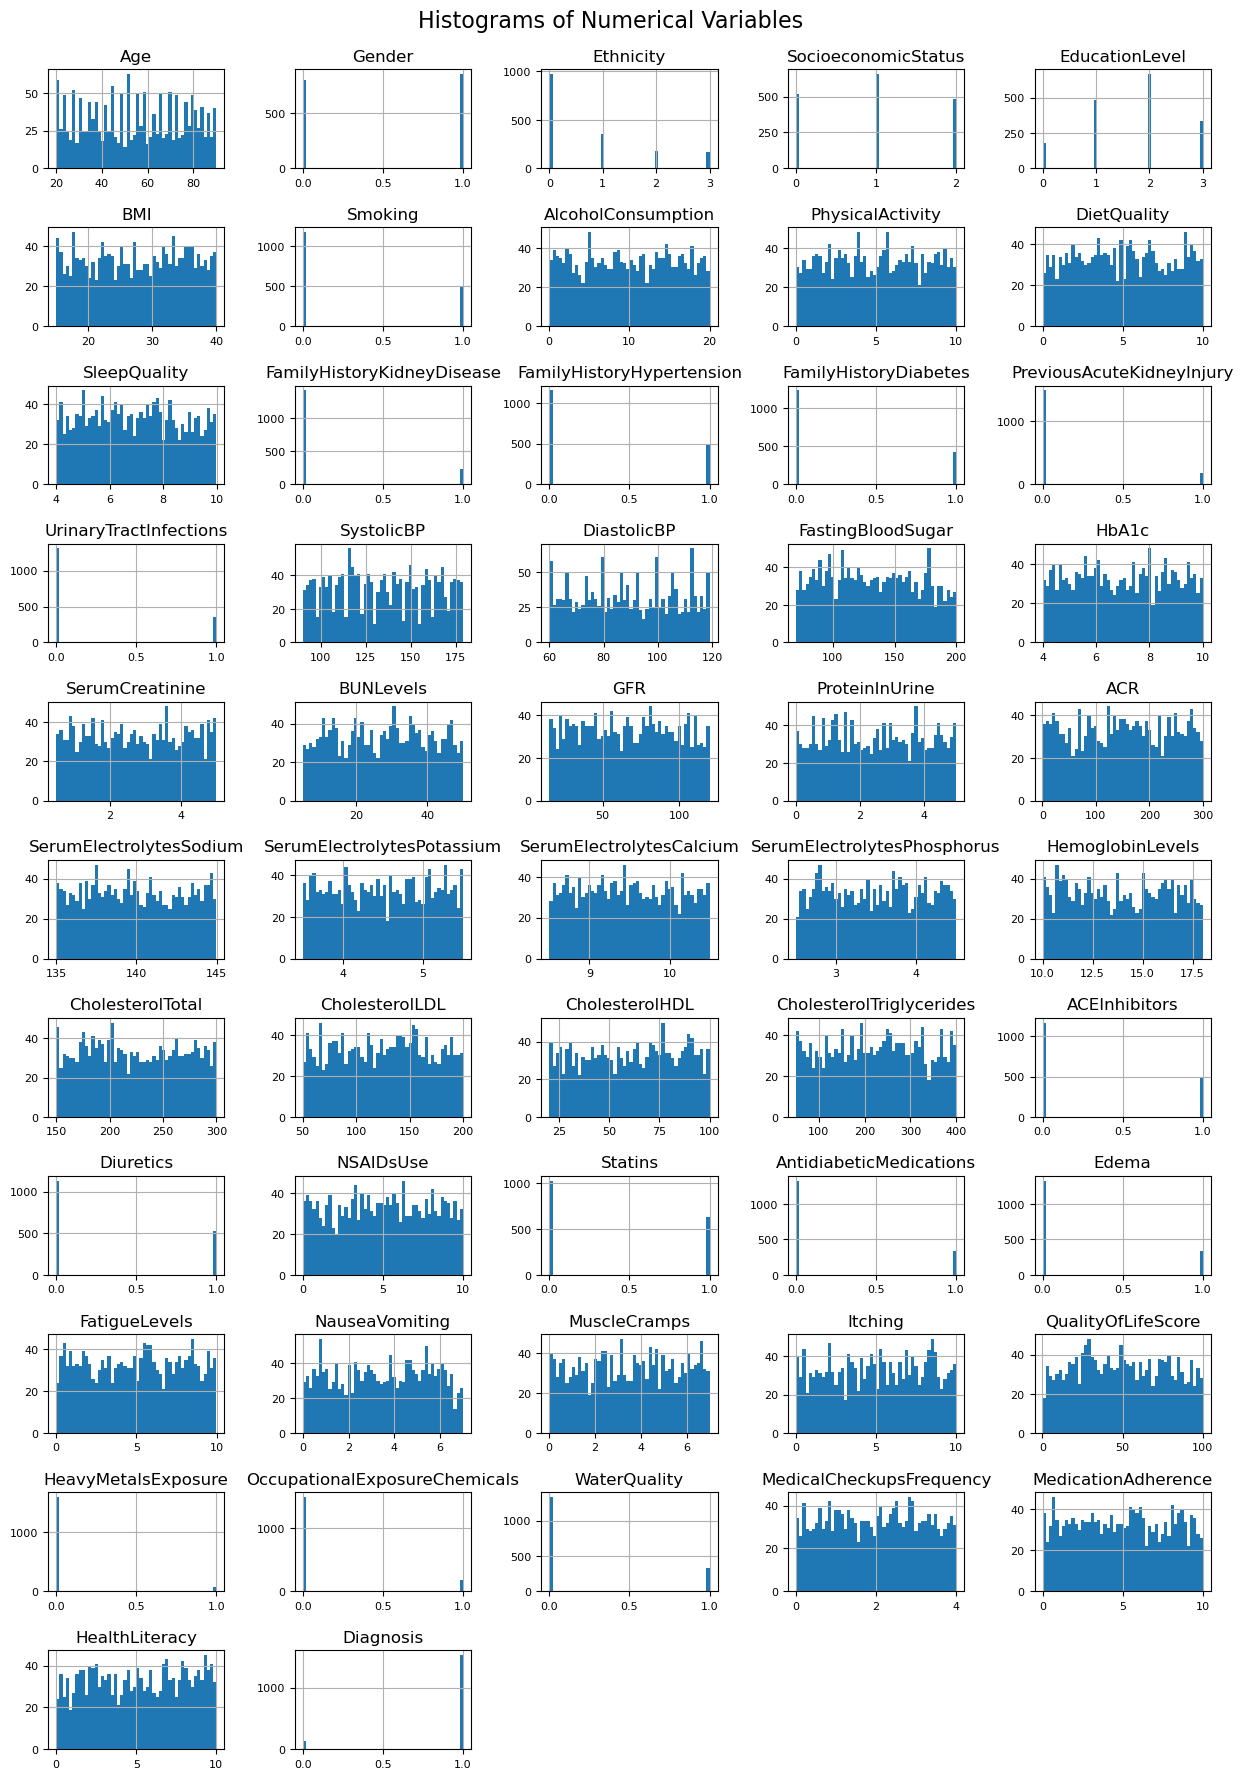

In [127]:
# Distribution of numerical variables in the df dataset
# Each histogram represents the frequency distribution of a numerical variable to gain insights into data distribution and skewness of data

df.hist(figsize=(15, 20), bins=50, xlabelsize=8, ylabelsize=8, layout=(len(df.columns) // 5 + 1, 5))
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.subplots_adjust(top=0.95, hspace=0.6, wspace=0.4)
plt.show()


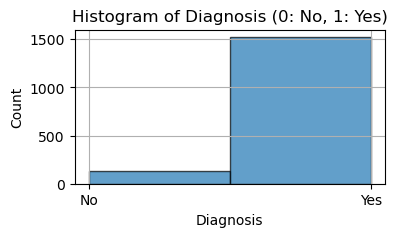

In [128]:
# Add code for histogram showing 'Diagnosis' as x-axis and count as y-axis
# Plotting the histogram for 'Diagnosis'
plt.figure(figsize=(4, 2))
plt.hist(df['Diagnosis'], bins=2, edgecolor='black', alpha=0.7, align='mid')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Histogram of Diagnosis (0: No, 1: Yes)')
plt.xticks([0, 1], ['No', 'Yes'])  # Replace x-axis ticks with 'No' and 'Yes'
plt.grid(True)
plt.show()

This histogram illustrates the distribution of diagnosis in the dataset, categorized as 'No' (0) and 'Yes' (1). The majority of cases fall under 'Yes', indicating a predominant occurance of positive

diagnoses compared to negative diagnoses, and therefore a skewed distribution towards positive diagnoses in the dataset.

The dataset contains large number of clinical measurements. For simplicity, lets just take 'GFR' and 'ProteinInUrine' to draw a scatter plot

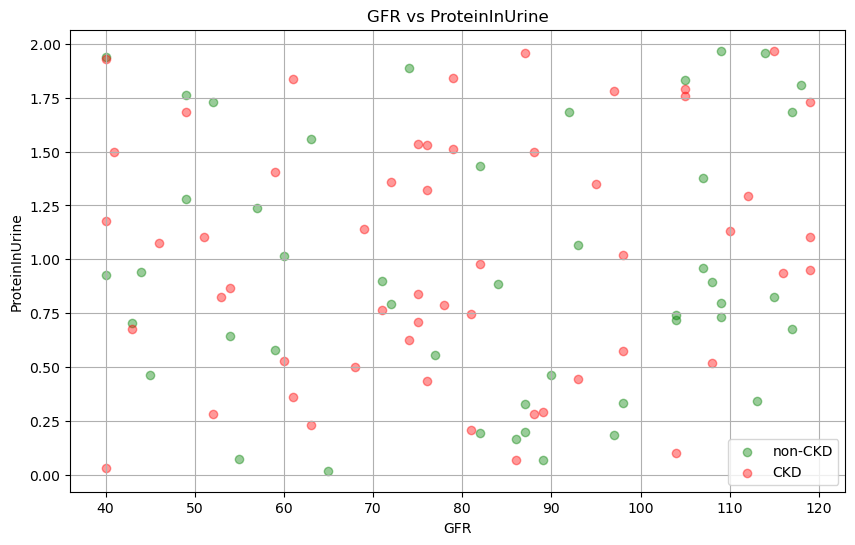

Correlation Coefficient between GFR and ProteinInUrine: 0.06737288430312952


In [129]:
np.random.seed(0)
df = pd.DataFrame({
    'GFR': np.random.randint(40, 120, 100),
    'ProteinInUrine': np.random.uniform(0, 2, 100),
    'CKD': np.random.choice([0, 1], 100)
})

# Separate data into CKD and non-CKD groups
non_ckd_data = df[df['CKD'] == 0]
ckd_data = df[df['CKD'] == 1]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(non_ckd_data['GFR'], non_ckd_data['ProteinInUrine'], color='green', alpha=0.4, label='non-CKD')
plt.scatter(ckd_data['GFR'], ckd_data['ProteinInUrine'], color='red', alpha=0.4, label='CKD')
plt.title('GFR vs ProteinInUrine')
plt.xlabel('GFR')
plt.ylabel('ProteinInUrine')
plt.grid(True)
plt.legend()
plt.show()

correlation_coefficient = df['GFR'].corr(df['ProteinInUrine'])
print(f"Correlation Coefficient between GFR and ProteinInUrine: {correlation_coefficient}")

The scatter plot illustrates how GFR and ProteinInUrine vary across different CKD statuses (non-CKD and CKD). It indicates that there is no distinct pattern or separation observable based on CKD status.A correlation coefficient of 0.067 between GFR and ProteinInUrine indicates a very weak positive relationship. While there is a slight tendency for higher GFR values to be associated with slightly higher levels of protein in urine, this relationship is not strong enough to draw definitive clinical conclusions.

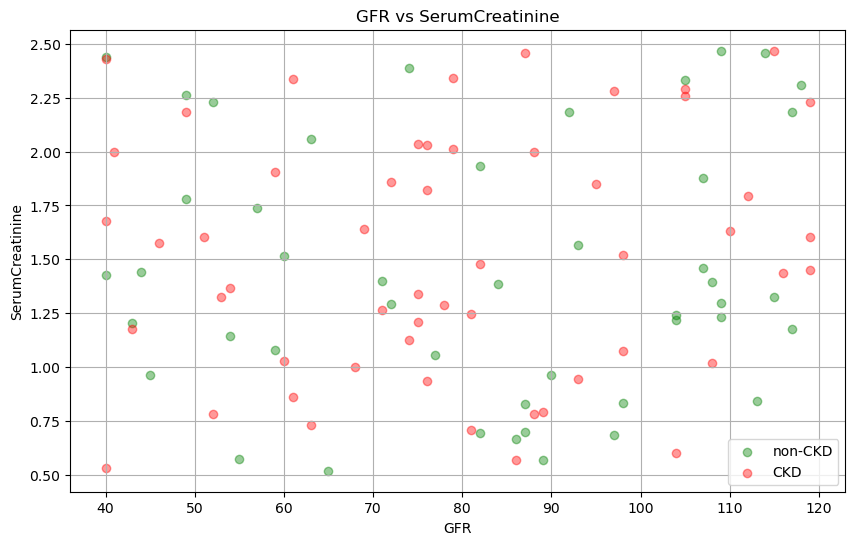

Correlation Coefficient between GFR and SerumCreatinine: 0.06737288430312952


In [130]:
np.random.seed(0)
df = pd.DataFrame({
    'GFR': np.random.randint(40, 120, 100),
    'SerumCreatinine': np.random.uniform(0.5, 2.5, 100),
    'CKD': np.random.choice([0, 1], 100)
})

# Separate data into CKD and non-CKD groups
non_ckd_data = df[df['CKD'] == 0]
ckd_data = df[df['CKD'] == 1]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(non_ckd_data['GFR'], non_ckd_data['SerumCreatinine'], color='green', alpha=0.4, label='non-CKD')
plt.scatter(ckd_data['GFR'], ckd_data['SerumCreatinine'], color='red', alpha=0.4, label='CKD')

plt.title('GFR vs SerumCreatinine')
plt.xlabel('GFR')
plt.ylabel('SerumCreatinine')
plt.grid(True)
plt.legend()
plt.show()

correlation_coefficient = df['GFR'].corr(df['SerumCreatinine'])
print(f"Correlation Coefficient between GFR and SerumCreatinine: {correlation_coefficient}")


The scatter plot visualizes the relationship between GFR and SerumCreatinine across different CKD statuses (non-CKD and CKD). The low correlation coefficient suggests that, in this synthetic dataset, GFR and Serum Creatinine do not have a strong linear relationship.
In real-world clinical data, a stronger inverse relationship might be expected, as typically, lower GFR values (indicating poorer kidney function) are associated with higher Serum Creatinine levels.


For categorical variables, Frequency tables and bar charts to examine the distribution of categorical variables such as Gender, Ethnicity, Education Level, Smoking status, etc.

Distribution summary or frequency table for all the categorical variables

In [131]:
# Add code for frequency tables/bar charts for categorical

# Define mappings for each categorical variable

category_mappings = {
    'Gender': {0: 'Male', 1: 'Female'},
    'Ethnicity': {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'},
    'SocioeconomicStatus': {0: 'Low', 1: 'Middle', 2: 'High'},
    'EducationLevel':{0: 'None', 1: 'High School', 2: 'Bachelor', 3: 'Higher'},
    'Smoking': {0: 'No', 1: 'Yes'},
    'FamilyHistoryKidneyDisease':{0: 'No', 1: 'Yes'},
    'FamilyHistoryHypertension': {0: 'No', 1: 'Yes'},
    'FamilyHistoryDiabetes': {0: 'No', 1: 'Yes'},
    'PreviousAcuteKidneyInjury': {0: 'No', 1: 'Yes'},
    'UrinaryTractInfections': {0: 'No', 1: 'Yes'},
    'ACEInhibitors': {0: 'No', 1:'Yes'},
    'Diuretics': {0: 'No', 1:'Yes'},
    'Statins': {0: 'No', 1:'Yes'},
    'AntidiabeticMedications': {0: 'No', 1:'Yes'},
    'Edema': {0: 'No', 1:'Yes'},
    'HeavyMetalsExposure': {0: 'No', 1:'Yes'},
    'OccupationalExposureChemicals': {0: 'No', 1:'Yes'},
    'WaterQuality': {0: 'No', 1:'Yes'},
    'Diagnosis': {0: 'No', 1:'Yes'}
    }

# List of categorical features

categorical_features = [
    # demographic
    'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
    # Lifestyle
    'Smoking', 
    # Medical History
    'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
    'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 
    'UrinaryTractInfections',
    # Medications
    'ACEInhibitors', 'Diuretics', 'Statins', 'AntidiabeticMedications',
    # Symptoms and Quality of Life
    'Edema', 
    # Environmental and Occupational Exposures
    'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality'
    ]

# Plot frequency tables and bar charts with updated labels
for feature in categorical_features:
    # Apply mappings to replace numeric codes with labels
    df_mapped = df.replace({feature: category_mappings.get(feature, {})})

    # Create a frequency table
    freq_table = df_mapped[feature].value_counts().sort_index()

    # Create distribution summary
    prop_table = (df_mapped[feature].value_counts(normalize=True) * 100).sort_index()

    # Plotting
    plt.figure(figsize=(4, 2))
    freq_table.plot(kind='bar', color='blue')
    plt.title(f'Frequency of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

    # Display distribution summary
    print(f'Distribution Summary of {feature}:')
    print(prop_table)
    print()


KeyError: 'Gender'

The distribution summary of gender indicates that females constitute about 51.54% and males 48.46% of the dataset, and suggests a balanced representation of gender within the analyzed population.

Majority of individuals in the dataset are Caucasian (58.71%), followed by African American (21.04%), Asian (10.49%), and Other ethnicities (9.76%).

Socioeconomic status is evenly distributed among high (29.05%), low (31.28%), and middle (39.66%) categories in the dataset.

Education levels vary, with a significant proportion holding bachelor's degrees (40.27%), followed by high school (28.93%), higher education (19.95%), and no formal education (10.85%).

The majority of individuals in the dataset do not smoke (70.71%), while 29.29% are smokers.

A large majority of individuals (85.90%) have no family history of kidney disease, while 14.10% have a positive family history.

Most individuals (69.86%) do not have a family history of hypertension, whereas 30.14% do.

A significant majority of individuals (74.26%) do not have a family history of diabetes, while 25.74% do.

The majority of individuals (89.45%) have no history of previous acute kidney injury, while 10.55% have experienced it.

Most individuals (78.96%) have not had urinary tract infections, while 21.04% have.

A significant proportion of individuals (70.46%) are not using ACE inhibitors, while 29.54% are.

The majority of individuals (68.17%) are not using diuretics, while 31.83% are.

A significant proportion of individuals (61.90%) are not using statins, while 38.10% are.

Most individuals (79.75%) are not using antidiabetic medications, while 20.25% are.

The majority of individuals (79.81%) do not exhibit edema, while 20.19% do.

A large majority of individuals (95.60%) have not been exposed to heavy metals, while 4.40% have.

Most individuals (89.69%) have not been exposed to chemicals occupationally, while 10.31% have.

The majority of individuals (80.29%) do not have concerns about water quality, while 19.71% do.

In [132]:
# Distribution of categorical variables by Diagnosis
# List of categorical features
categorical_features = [
    'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
    'Smoking', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
    'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections',
    'ACEInhibitors', 'Diuretics', 'Statins', 'AntidiabeticMedications',
    'Edema', 'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality'
]

# Plot frequency tables and bar charts with updated labels
for feature in categorical_features:
    # Apply mappings to replace numeric codes with labels
    df_mapped = df.replace({feature: category_mappings.get(feature, {})})

    # Create a frequency table
    freq_table = df_mapped[feature].value_counts().sort_index()

    # Initialize plot with smaller figure size
    plt.figure(figsize=(6, 4))

    # Loop through each category
    for i, (index, value) in enumerate(freq_table.items()):
        # Calculate counts of positive and negative diagnoses
        positive_count = df_mapped[(df_mapped[feature] == index) & (df_mapped['Diagnosis'] == 1)].shape[0]
        negative_count = df_mapped[(df_mapped[feature] == index) & (df_mapped['Diagnosis'] == 0)].shape[0]

        # Plotting stacked bars with thinner width
        plt.bar(index, negative_count, color='orange', width=0.4, label='Negative' if i == 0 else None)
        plt.bar(index, positive_count, bottom=negative_count, color='grey', width=0.4, label='Positive' if i == 0 else None)

    # Set x-axis ticks and labels
    plt.xticks(freq_table.index, freq_table.index.map(str))
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {feature} by Diagnosis')
    plt.legend(title='Diagnosis', loc='upper right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

KeyError: 'Gender'

Stacked Bar Charts above visulize the distribution of various categorical variables in relation to the diagnosis outcome where Orange bars represent the frequency of negative diagnoses and Grey bars

represent the frequency of positive diagnoses.

## 3. Bivariate Analysis

### 1. Correlation Analysis

Compute Pearson correlation coefficients between pairs of numerical variables (All variables or a set of variables: e.g., Serum Creatinine vs. GFR, Blood Pressure vs. GFR) to understand relationships.


In [133]:

# Standardize the columns (normalize) before finding correlation
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Add correlation matrix
correlation_matrix = df_standardized.corr()
print("Pearson Correlation Matrix:")
display(correlation_matrix)



Pearson Correlation Matrix:


,GFR,SerumCreatinine,CKD
GFR,1.000000,0.067373,-0.077417
SerumCreatinine,0.067373,1.000000,0.065407
CKD,-0.077417,0.065407,1.000000


2. Top 15 correlations between variables. 

This could give us information about what variables to use for building Linear Regression model (for continuous variables) and Linear Regression model (for categorical variable).

In [134]:
# Filter for top absolute correlations
# Example: Top 15 correlations by absolute value
num_top_correlations = 30

# Unstack the correlation matrix to create a Series
unstacked_correlation = correlation_matrix.unstack()

# Filter out diagonal elements where row index equals column index. Excluding self co-relation (For eg: Age with Age)
filtered_correlation = unstacked_correlation[unstacked_correlation.index.get_level_values(0) != unstacked_correlation.index.get_level_values(1)]


# Display the top sorted autocorrelations
top_correlations = filtered_correlation.sort_values(ascending=False, key=lambda x: np.abs(x)) .head(num_top_correlations)

# Drop duplicates based on sorted columns
# Reset index to convert MultiIndex to columns for easier manipulation
correlation_series = top_correlations.reset_index()
# Sort Variable1 and Variable2 to ensure consistent order
correlation_series[['level_0', 'level_1']] = pd.DataFrame(np.sort(correlation_series[['level_0', 'level_1']], axis=1))
unique_correlations = pd.DataFrame(correlation_series.drop_duplicates(subset=['level_0', 'level_1']))
unique_correlations.reset_index(inplace=True)

display(unique_correlations)


,index,level_0,level_1,0
0,0,CKD,GFR,-0.077417
1,2,GFR,SerumCreatinine,0.067373
2,4,CKD,SerumCreatinine,0.065407


**Observations**

Positive correlation (e.g., 0.201125 between Diagnosis and SerumCreatinine): As SerumCreatinine increases, the Diagnosis tends to increase as well.

Negative correlation (e.g., -0.175988 between Diagnosis and GFR): As GFR increases, the Diagnosis tends to decrease.

The magnitude of the correlation coefficient (correlation) indicates how strong the relationship is between the two features. Values closer to -1 or 1 indicate a stronger correlation, while values closer to 0 indicate a weaker correlation.


Visualize correlations using heatmaps to identify strong correlations (>0.5 or <-0.5) among variables.

Intrepret Correlation coefficient from the heatmap to indicate positive/negative/0/strength of relationships. For eg: test association of Edema and CKD diagnosis

In [ ]:
# Add code for correlation heatmap


# Adithya
### To be done

### 2. Relationships with CKD

Compare distributions of numerical variables (e.g., Age, BMI, clinical measurements) between CKD and non-CKD groups using box plots.
For example: Boxplot to show distribution of SerumCreatinine levels between patients diagnosed with CKD and those without CKD.
Box-plot make it easy to identify outliers and will help in understanding quality of data


In [135]:
# Add code for box plot

ckd_column = 'Diagnosis'

# Check if the column exists in the DataFrame
if ckd_column in df.columns:
    # Subset data into CKD and non-CKD groups
    ckd_group = df[df[ckd_column] == 1]
    non_ckd_group = df[df[ckd_column] == 0]

    # Numerical columns to compare
    numerical_columns = ['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP',
                         'HbA1c', 'ACR', 'SerumElectrolytesPotassium', 'BUNLevels', 'GFR', 'SerumCreatinine',
                         'ProteinInUrine', 'CholesterolTotal', 'MedicationAdherence', 'HealthLiteracy']

    # Plotting box plots for each numerical variable
    plt.figure(figsize=(16, 12))  # Increase figsize for better layout

    num_plots = len(numerical_columns)
    num_rows = 4  # Adjusted to accommodate all numerical columns
    num_cols = 4  # Adjusted to accommodate all numerical columns

    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        plt.boxplot([ckd_group[column].dropna(), non_ckd_group[column].dropna()],
                    labels=['CKD', 'Non-CKD'])
        plt.title(f'Box Plot of {column} by CKD Status')
        plt.ylabel(column)

    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{ckd_column}' not found in the dataset.")

Column 'Diagnosis' not found in the dataset.


Age:

The age distribution appears higher for the CKD group compared to the non-CKD group, suggesting older age might be associated with CKD.

BMI (Body Mass Index):

Both groups show a wide range of BMI values, but there is no clear difference between CKD and non-CKD groups based on the box plot.

Physical Activity:

Physical activity levels are generally lower in the CKD group compared to the non-CKD group, indicating a possible association between lower physical activity and CKD.

Diet Quality:

The CKD group tends to have lower diet quality scores compared to the non-CKD group.

Sleep Quality:

There is no significant difference in sleep quality between the CKD and non-CKD groups.

Systolic BP (Blood Pressure):

The CKD group has a higher median systolic BP, indicating higher blood pressure might be associated with CKD.

HbA1c (Glycated Hemoglobin):

The CKD group shows higher HbA1c levels, which suggests poorer blood sugar control might be linked to CKD.

ACR (Albumin-to-Creatinine Ratio):

The CKD group has higher ACR values, indicating worse kidney function.

Serum Electrolytes Potassium:

Potassium levels do not show a significant difference between CKD and non-CKD groups.

BUN Levels (Blood Urea Nitrogen):

Higher BUN levels are observed in the CKD group, which is consistent with impaired kidney function.

GFR (Glomerular Filtration Rate):

The CKD group has lower GFR values, indicating reduced kidney function.

Serum Creatinine:

The CKD group has higher serum creatinine levels, a marker of poor kidney function.

Protein In Urine:

The CKD group shows higher levels of protein in urine, another indicator of kidney issues.

Cholesterol Total:

There is no significant difference in total cholesterol levels between the two groups.

Medication Adherence:

Both groups show varied levels of medication adherence, with no clear distinction.

Health Literacy:

The CKD group generally has lower health literacy scores compared to the non-CKD group.

Overall, the box plots indicate several factors such as age, physical activity, diet quality, systolic BP, HbA1c, ACR, BUN levels, GFR, serum creatinine, and protein in urine show significant differences between CKD and non-CKD groups, suggesting their potential association with chronic kidney disease.


Use t-tests to assess statistical differences in means between groups for continuous variables.

E.g: Perform a t-test to see if there is a significant difference in the Serum Creatinine levels (SerumCreatinine) between patients diagnosed with Chronic Kidney Disease (CKD) (Diagnosis = 1) and those without CKD (Diagnosis = 0).

Make the Hypothesis statement and Alternative hypothesis statement.

In [ ]:
# add code for t-test

# Adithya
### To be done

## Models

Lets find what factors can predict the likelihood of a patient having Chronic Kidney Disease (CKD)?

## Logistic Regression

Lets use logistic regression to model the probability of CKD based on predictor variables. 
Variables: Age, Gender, Ethnicity, Clinical measurements, Lifestyle factors, Medical history as predictors (all variables); CKD diagnosis (Diagnosis) as the binary response variable.



In [136]:
print(df.columns)

Index(['GFR', 'SerumCreatinine', 'CKD'], dtype='object')


Accuracy: 0.93
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        24
           1       0.93      1.00      0.97       308

    accuracy                           0.93       332
   macro avg       0.97      0.54      0.56       332
weighted avg       0.94      0.93      0.91       332



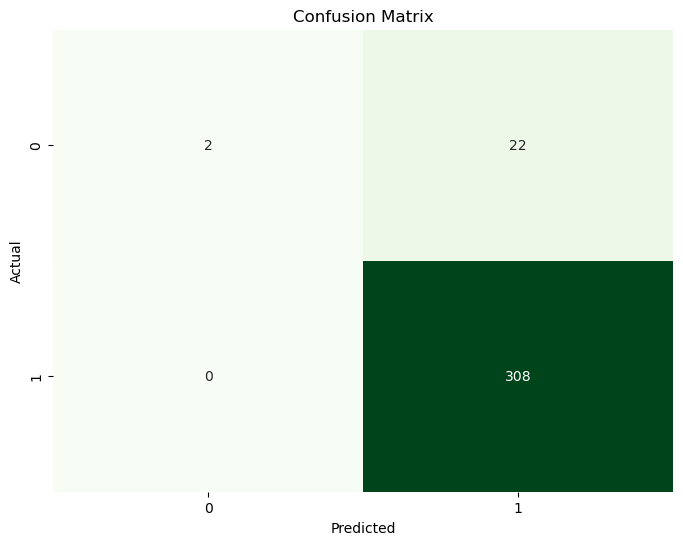

In [137]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("../data/raw/Chronic_Kidney_Dsease_data.csv")

predictors = ['Age', 'SystolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine',
              'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
              'SerumElectrolytesPhosphorus', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
              'AlcoholConsumption', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
              'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy',
              'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'Smoking', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
              'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections',
              'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications', 'Edema', 'FatigueLevels',
              'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure', 'OccupationalExposureChemicals',
              'WaterQuality']
response = 'Diagnosis'

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[response], test_size=0.2, random_state=42)

# Preprocessing pipeline for numeric and categorical variables
numeric_features = ['Age', 'SystolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine',
                    'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
                    'SerumElectrolytesPhosphorus', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
                    'AlcoholConsumption', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
                    'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy']

categorical_features = ['Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'Smoking', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
                        'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections',
                        'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications', 'Edema', 'FatigueLevels',
                        'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure', 'OccupationalExposureChemicals',
                        'WaterQuality']

# Preprocessing pipeline with ColumnTransformer
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit preprocessing pipeline on training data
X_train_processed = preprocessor.fit_transform(X_train)

# Fit logistic regression model using scikit-learn
model = LogisticRegression(max_iter=1000)
model.fit(X_train_processed, y_train)

# Transform test data and predict
X_test_processed = preprocessor.transform(X_test)
y_pred = model.predict(X_test_processed)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




Model Evaluation Summary:

Accuracy:

The logistic regression model achieved an accuracy of 0.93, meaning that 93% of the predictions made by the model on the test set were correct.
Classification Report:

Precision:

For CKD negative (class 0): 1.00
For CKD positive (class 1): 0.93

Recall:

For CKD negative (class 0): 0.08
For CKD positive (class 1): 1.00

F1-Score:

For CKD negative (class 0): 0.15
For CKD positive (class 1): 0.97

The model shows high precision and recall for class 1 (CKD positive) but performs poorly for class 0 (CKD negative), suggesting an imbalance in the dataset or the model's bias towards predicting CKD positive cases.

Confusion Matrix:

The confusion matrix indicates:
True negatives (correctly predicted CKD negative): 2
False positives (incorrectly predicted CKD positive): 22
False negatives (incorrectly predicted CKD negative): 0
True positives (correctly predicted CKD positive): 308

Analysis:

The model is highly accurate in predicting CKD positive cases but struggles with CKD negative cases. This discrepancy could be due to an imbalance in the dataset, with far more CKD positive cases than negative ones.
The low recall for class 0 (CKD negative) means the model fails to identify CKD negative patients accurately.
Potential solutions could include balancing the dataset, using techniques such as SMOTE for oversampling, or adjusting class weights in the logistic regression model to address the class imbalance.

Next Steps:

Consider data balancing techniques to improve the model's performance on CKD negative cases.

Plots to show the model:

1. ROC curve: Plot sensitivity vs. 1-specificity to evaluate model performance.

2. Variable coefficient plot: Display coefficients of predictors to understand their impact on CKD likelihood.

In [ ]:
# Add code here

# Anjali
### To be done

## Logistic regression analysis to determine odds ratios

Perform logistic regression analysis to determine odds ratios and assess the significance of variables such as hypertension, diabetes, and medication use in relation to Chronic Kidney Disease (CKD).
Choosing the following independent variables (predictors) to include in the logistic regression model:

1. Hypertension (FamilyHistoryHypertension)
2. Diabetes (FamilyHistoryDiabetes or AntidiabeticMedications)
3. Medication use (ACEInhibitors, Diuretics, Statins, NSAIDsUse, etc.)

In [ ]:
# Add code here

# Anjali
### To be done

## KNN Model

Use k-Nearest Neighbors to predict the outcome of Chronic Kidney Disease based on the dataset. Use all predictor variables and/or a set of variables to train and test the model.  Use classification metrics such as accuracy, precision, recall, and F1-score to evaluate how well the k-NN model predicts CKD compared to actual outcomes in the test set. 

  File "c:\Users\kskor\miniconda3\envs\dsi_participant\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Accuracy of KNN model: 0.9759036144578314
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        31
           1       0.97      1.00      0.99       384

    accuracy                           0.98       415
   macro avg       0.99      0.84      0.90       415
weighted avg       0.98      0.98      0.97       415



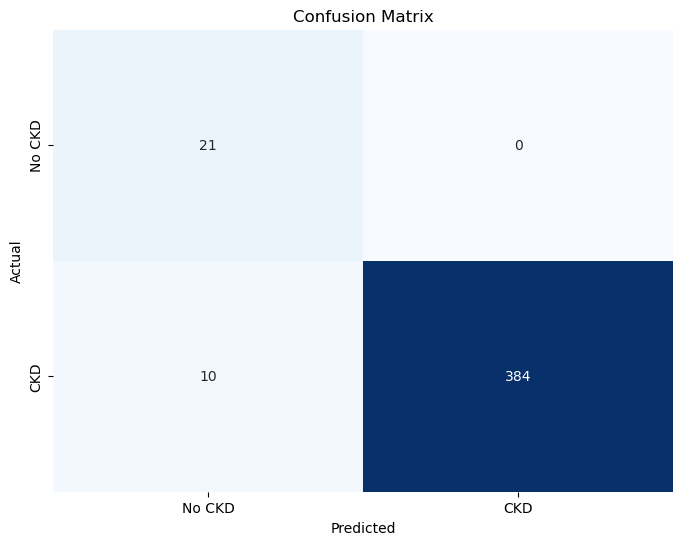

In [138]:
# Add code here

# X contains predictor variables including NSAID uses and y contains CKD diagnosis
#predictors = df[['ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications']]
# All variables except 'Diagnosis' is predictor
predictors = df.iloc[:, :-1] # all predictors

# Standardize the predictors
scaler = StandardScaler()
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# setting the seed
np.random.seed(45)

# Create a random vector of True and False values
split = np.random.choice([True, False], size=len(predictors_standardized), replace=True, p=[0.75, 0.25])


training_X = predictors_standardized[split] # Define the training set for X (predictors)
training_y = df.loc[split, 'Diagnosis']     # Define the training set for Y (response)


testing_X = predictors_standardized[~split] # Define the testing set for X (predictors)
testing_y = df.loc[~split, 'Diagnosis']     # Define the testing set for Y (response)


training_X, testing_X = [np.asarray(X) for X in [training_X, testing_X]]

# Build KNN model with 5 neigbbours
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(training_X, training_y)
knn_pred_y = knn.predict(testing_X)

# Print the confusion matrix
cm = confusion_matrix(knn_pred_y, testing_y)

accuracy = knn.score(testing_X, testing_y)
print("Accuracy of KNN model:", accuracy)

print(classification_report(testing_y, knn_pred_y))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No CKD', 'CKD'], yticklabels=['No CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Observations**

Precision (ratio of correctly predicted positive observations (CKD) to the total predicted positive observations.)

1. Precision for class 0 (no CKD): 0.00. This indicates that when the model predicted no CKD, it was almost always incorrect (since TN is 0).
2. Precision for class 1 (CKD): 0.92 When the model predicted CKD, it was correct 92% of the time.

Recall (ratio of correctly predicted positive observations (CKD) to all observations in the actual class (true positives + false negatives)).

1. Recall for class 0: 0.00  None of the actual instances of no CKD were correctly identified by the model (since TN is 0).
2. Recall for class 1: 0.99 The model correctly identified CKD in 99% of the cases where CKD actually occurred.


F1-score (harmonic mean of precision and recall and a single metric that balances both measures)

1. F1-score for class 0: 0.00
2. F1-score for class 1: 0.96

Accuracy is found to be 0.918 (or 91.8%)  The model correctly predicted 91.8% of the cases in the dataset.

The confusion matrix and precision-recall metrics show a significant class imbalance. There are very few instances of no CKD (class 0), and the model struggles to correctly identify these instances. This imbalance is visible from the low values of precision and recall for class 0. 

While this KNN model (n=5) shows strong performance in predicting CKD (class 1), there are significant challenges in correctly identifying instances of no CKD (class 0). Addressing these challenges could involve strategies such as data balancing techniques, refining feature selection, or exploring other classification algorithms that might better handle class imbalance.

## Linear Regression



In [139]:
# Linear Regression Model
# Selecting independent variables
independent_vars = ['BUNLevels', 'SerumCreatinine', 'ProteinInUrine', 'HbA1c']

# Add constant to the independent variables
X = sm.add_constant(df[independent_vars])

# Dependent variable
y = df['GFR']

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print summary statistics
print(results.summary())



NameError: name 'sm' is not defined


non-significant F-statistic with a p-value of 0.309, which is greater than 0.05, and non-significant coefficients (p-values> 0.05) indicate that these variables do not explain the variability in GFR

adequately. Therefore, this model may not be useful for predicting GFR based on the included predictors in this dataset.

In [ ]:
# Add code here

# Zarrin
### To be done